# Lista de Exercício 7
### Introdução à Visão Computacional (SEL0339/SEL5886)

**Instruções:**

 1. Esta lista consiste de 3 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminado os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0339-SEL5886_2021/blob/main/praticas/Lista_de_Exercicio_7.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0339-SEL5886_2021/blob/main/praticas/Lista_de_Exercicio_7.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: Murilo Henrique Pasini Trevisan `

`Número USP: 9796078 `


### Introdução:


Vamos importar as bibliotecas que iremos utilizar:

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from skimage.transform import hough_circle, hough_circle_peaks

#### **Atenção**: os códigos abaixo são para fazer o download das imagens (EXECUTE-OS). Os mesmos não fazem parte dessa prática. 

In [76]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_07/test_01.png", "test_01.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_07/house.tif", "house.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_07/wirebond_mask.tif", "wirebond_mask.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")


try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_07/notas_functions.py", "notas_functions.py")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

### 1) Filtros derivativos de $1^a$ e $2^a$ ordem

A equação para o cálculo da $1^a$ derivada em relação a $y$ é dada por:

\begin{equation}
\frac{\partial f(x,y)}{\partial y} = f(x,y+1) - f(x,y)
\end{equation}

Já a equação para o cálculo da $2^a$ derivada em relação a $y$ é dada por:

\begin{equation}
\frac{\partial^2 f(x,y)}{\partial y^2} = f(x,y+1) - 2f(x,y) + f(x,y-1)
\end{equation}

**Exercício:**

1. Crie um *kernel* para o filtro derivativo de $1^a$ ordem e um *kernel* para o de $2^a$ ordem.

2. Aplique os *kernels* para detectar as bordas na vertical, ou seja, no eixo $y$. A imagem já está criada no código.

3. Mostre a imagem original e ambos os resultados utilizando `subplot`. 

4. Utilize a função `plt.plot` para mostrar o perfil das bordas detectadas em ambos os casos. Isso pode ser feito através de qualquer linha da imagem resultante. Utilize um `subplot` com 3 linhas e 1 coluna, sendo a primeira linha para o perfil da imagem original, a segunda para o filtro de $1^a$ ordem e a terceira para o filtro de $2^a$ ordem.

<details>    
<summary>
    <font size="3" color="darkblue"><b>Dicas:</b></font>
</summary>

*  Você pode utilizar a função [cv.filter2D](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) para fazer a filtragem. 

*  Você pode utilizar a função [plt.plot](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html) para mostrar os gráficos na tela. Você pode fazer a leitura de qualquer linha da imagem para mostrar o gráfico. 

*Ex:*
``` python
plt.plot(x,y)
plt.plot(y) # Dessa maneira a função cria um range para o x
cv.filter2D(myImg, -1, myKernel)
```

Text(0.5, 1.0, '2 ordem')

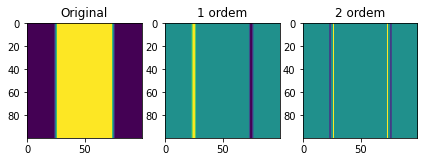

In [34]:
img = np.zeros((100,100),np.float32)
img[:,25:75] = 255
img = cv.blur(img,(3,3))

## -- Seu código começa AQUI -- ##

Kernel_1 = np.array(((-1, 0, 1),
                     (-1, 0, 1),
                     (-1, 0, 1)))

Kernel_2 = np.array(((-1, -1, -1),
                     (-1,  8, -1),
                     (-1, -1, -1)))

img_filter_1 = cv.filter2D(img, -1, Kernel_1)
img_filter_2 = cv.filter2D(img, -1, Kernel_2)

plt.figure(figsize = (7,7))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(img_filter_1)
plt.title("1 ordem")

plt.subplot(1,3,3)
plt.imshow(img_filter_2)
plt.title("2 ordem")





## -- Seu código termina AQUI -- ##


### 2) Detector de bordas (Prewitt e Sobel)

**Exercício:**

1. Aplicar o detector de bordas de Prewitt e Sobel na imagem ```wirebond_mask.tif``` para detectar as bordas horizontais e depois as verticais. Note que vários *kernels* foram fornecidos abaixo. Alguns serão utilizados no próximo exercício também.

2. Mostre as 4 imagens resultantes e comente os resultados encontrados.

<details>    
<summary>
    <font size="3" color="darkblue"><b>Dicas:</b></font>
</summary>

*  Nós criamos uma lista contendo os *kernels* de cada método. Você pode criar um laço de repetição para pegar cada kernel da lista. Segue abaixo um exemplo de um `for loop` em uma lista.

*Ex:*
``` python
kernel_lista = [kernel1,kernel2,kernel3]
for kernel in kernel_lista:
  print(kernel)
# Resultado do print:   
# kernel1
# kernel2
# kernel3
```

Text(0.5, 1.0, 'Sobel y')

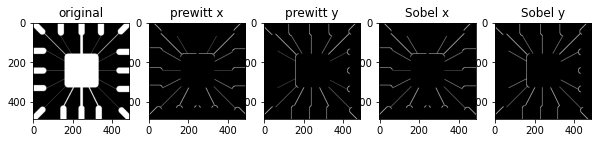

In [81]:
# Prewitt
p1 = np.array(((-1,-1,-1),
               ( 0, 0, 0),
               ( 1, 1, 1)))

p2 = np.array(((-1, 0, 1),
               (-1, 0, 1),
               (-1, 0, 1)))

# Lista com todos os kernels (Prewitt)
prewitt = [p1,p2]

# Sobel
s1 = np.array(((-1,-2,-1),
               ( 0, 0, 0),
               ( 1, 2, 1)))

s2 = np.array(((-1, 0, 1),
               (-2, 0, 2),
               (-1, 0, 1)))

s3 = np.array(((-2,-1, 0),
               (-1, 0, 1),
               ( 0, 1, 2)))

s4 = np.array((( 0, 1, 2),
               (-1, 0, 1),
               (-2,-1, 0)))
 
s5 = np.array((( 2, 1, 0),
               ( 1, 0,-1),
               ( 0,-1,-2)))

s6 = np.array((( 0,-1,-2),
               ( 1, 0,-1),
               ( 2, 1, 0)))

# Lista com todos os kernels (Sobel)
sobel = [s1,s2,s3,s4,s5,s6]

# Laplaciano
laplaciano = np.array(((-1,-1,-1),
                       (-1, 8,-1),
                       (-1,-1,-1)))

## -- Seu código termina AQUI -- ##

wire = cv.imread("wirebond_mask.tif")

wire_filter_yp = cv.filter2D(wire, -1, p1)
wire_filter_xp = cv.filter2D(wire, -1, p2)

wire_filter_ys = cv.filter2D(wire, -1, s1)
wire_filter_xs = cv.filter2D(wire, -1, s2)

plt.figure(figsize = (10,10))
plt.subplot(1,5,1)
plt.imshow(wire)
plt.title("original")

plt.subplot(1,5,2)
plt.imshow(wire_filter_yp)
plt.title("prewitt x")

plt.subplot(1,5,3)
plt.imshow(wire_filter_xp)
plt.title("prewitt y")

plt.subplot(1,5,4)
plt.imshow(wire_filter_ys)
plt.title("Sobel x")

plt.subplot(1,5,5)
plt.imshow(wire_filter_xs)
plt.title("Sobel y")

#Nota-se que para os kernels em y somente as linhas que possuem variação em y
#foram mantidas, assim como em x somente as que variam em x, além disso notou-se
#que para estes exemplos a diferença entre prewitt e sobel não é tão expressiva
#visto que as imagens já possuem bordas bem destacadas, porém nota-se que para os
#kernels em sobel, houve maior destaque na borda, comparado a prewitt, como 7
#esperado pela teoria dos kernels de prewitt e sobel

## -- Seu código termina AQUI -- ##

### 3) Detector de bordas (Sobel e Laplaciano)

**Exercício:**

1. Aplicar o detector de bordas de Sobel na imagem ```house.tif``` para detectar todas as bordas. Os *kernels* foram definidos no exercício anterior. 

  *   Para cada *kernel*, aplique um *threshold* no resultado do filtro a fim de tentar manter somente as bordas que aquele filtro foi desenvolvido para detectar. Nas dicas deixamos um valor sugerido;
  *   Some o resultado obtido por cada *kernel* em uma variável chamada `sobel_sum`.

2. Mostre os 6 resultados anteriores e um `subplot`;

3. Aplique o detector de bordas Laplaciano na imagem ```house.tif```. Criei um `sobplot` para mostrar a imagem original, a soma de todos os resultados de Sobel (`sobel_sum`) e por fim o resultado do Laplaciano. O que se pode concluir?

<details>    
<summary>
    <font size="3" color="darkblue"><b>Dicas:</b></font>
</summary>

*  O valor de *threshold* sugerido é 220. Esse não é um valor ótimo para cada *kernel*, mas sim um valor médio para todos os *kernels* no geral.

*  Faça um `for loop` para aplicar os filtros de Sobel. Isso simplifica o código

*Ex:*
``` python
kernel_lista = [kernel1,kernel2,kernel3]
for kernel in kernel_lista:
  print(kernel)
# Resultado do print:   
# kernel1
# kernel2
# kernel3
```

Text(0.5, 1.0, 'Laplaciano')

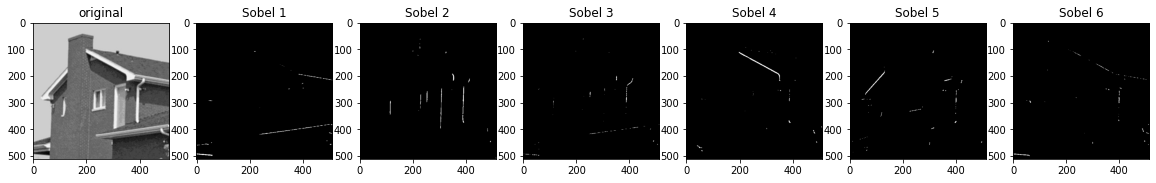

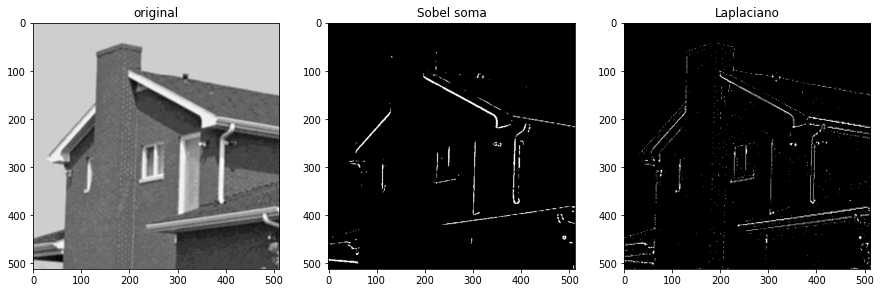

In [109]:
## -- Seu código começa AQUI -- ##

house = cv.imread("house.tif", cv.IMREAD_GRAYSCALE)

house_filter = cv.filter2D(house, -1, s1)
(thresh, house_1) = cv.threshold(house_filter, 220, 255, cv.THRESH_BINARY)  

house_filter = cv.filter2D(house, -1, s2)
(thresh, house_2) = cv.threshold(house_filter, 220, 255, cv.THRESH_BINARY)  

house_filter = cv.filter2D(house, -1, s3)
(thresh, house_3) = cv.threshold(house_filter, 220, 255, cv.THRESH_BINARY)  

house_filter = cv.filter2D(house, -1, s4)
(thresh, house_4) = cv.threshold(house_filter, 220, 255, cv.THRESH_BINARY)  

house_filter = cv.filter2D(house, -1, s5)
(thresh, house_5) = cv.threshold(house_filter, 220, 255, cv.THRESH_BINARY)  

house_filter = cv.filter2D(house, -1, s6)
(thresh, house_6) = cv.threshold(house_filter, 220, 255, cv.THRESH_BINARY)  

Sobel_sum = house_1 + house_2 + house_3 + house_4 + house_5 + house_6

house_filter = cv.filter2D(house, -1, laplaciano)
(thresh, house_lap) = cv.threshold(house_filter, 40, 255, cv.THRESH_BINARY) 


plt.figure(figsize = (20,20))
plt.subplot(1,7,1)
plt.imshow(house, cmap="gray")
plt.title("original")

plt.subplot(1,7,2)
plt.imshow(house_1, cmap="gray")
plt.title("Sobel 1")

plt.subplot(1,7,3)
plt.imshow(house_2, cmap= "gray")
plt.title("Sobel 2")

plt.subplot(1,7,4)
plt.imshow(house_3, cmap= "gray")
plt.title("Sobel 3")

plt.subplot(1,7,5)
plt.imshow(house_4, cmap= "gray")
plt.title("Sobel 4")

plt.subplot(1,7,6)
plt.imshow(house_5, cmap= "gray")
plt.title("Sobel 5")

plt.subplot(1,7,7)
plt.imshow(house_6, cmap= "gray")
plt.title("Sobel 6")

plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
plt.imshow(house, cmap="gray")
plt.title("original")

plt.subplot(1,3,2)
plt.imshow(Sobel_sum, cmap="gray")
plt.title("Sobel soma")

plt.subplot(1,3,3)
plt.imshow(house_lap, cmap= "gray")
plt.title("Laplaciano")


#Conclui-se que cada sobel obteve em cada direção o filtro, a partir da direção
#do kernel, como esperado, e assim como previsto pela teoria, caso realize a
#filtragem da primeira derivada em todas as direções, o resultado é um filtro
#semelhante a um de segunda ordem, como pode ser visto pela comparação entre a 
#soma dos filtros de sobel e do laplaciano, porém, nota-se que o threshold do
#filtro laplaciano teve que ser menor que o da soma dos filtros de sobel, devido
#a forma como é feita a filtragem em segunda ordem e primeira ordem, porém 
#ajustando-se os thresholds, obteve-se imagens semelhantes

## -- Seu código termina AQUI -- ##